# **Anallyzer AI - beta**

### Membros do grupo:

- Vitor Kubica - RM: 98903
- Nicholas Santos - RM: 551809
- Eduardo Violante - RM: 550364
- Pedro Pacheco - RM: 98043
- Beatriz Svestka - RM: 551534


### **Diferenças entre a etapa anterior e a atual**
Na proposta inicial, apresentamos o treinamento de uma IA usando o modelo CNN para analisar o escopo da campanha de e-mail marketing. Agora, na etapa atual, estamos utilizando o algoritmo KNN para identificar o 'elo fraco' nas campanhas, ou seja, qual métrica precisa ser melhorada para otimizar os resultados.

### **Funcionamento da IA**
Estamos usando o algoritmo K-Nearest Neighbors (KNN) para identificar padrões nos dados de campanhas de e-mail marketing. Por exemplo, se temos um total de 1000 leads, 1120 envios, 200 aberturas, 5 cliques e um crescimento de clientes de 1, o KNN nos ajuda a identificar que o 'elo fraco' dessa campanha são os cliques.

### **Framewors/Bibliotecas Python utilizados -- beta**
- Pandas
- ScikitLearn
- Matplotlib
- Seaborn
- KNN (K-Nearest-Neighbor)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('dataset.csv')

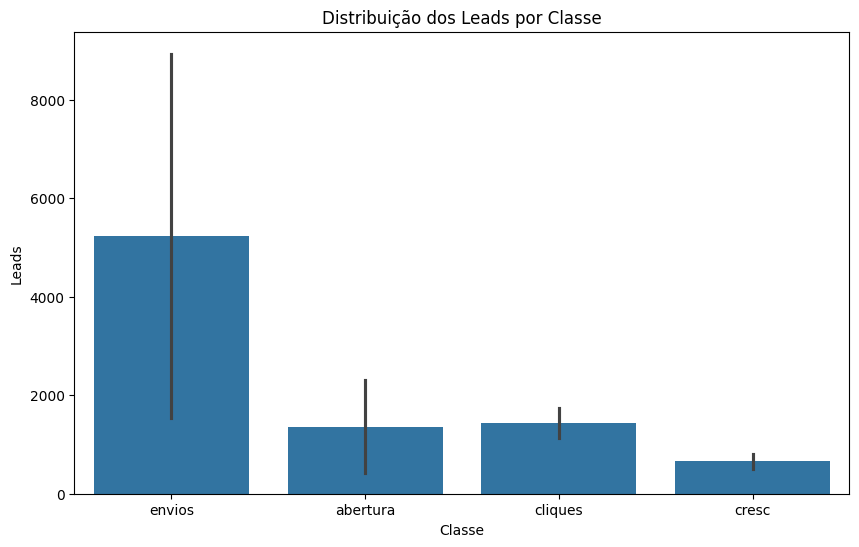

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Classe', y='Leads', data=df)
plt.title('Distribuição dos Leads por Classe')
plt.xlabel('Classe')
plt.ylabel('Leads')
plt.show()

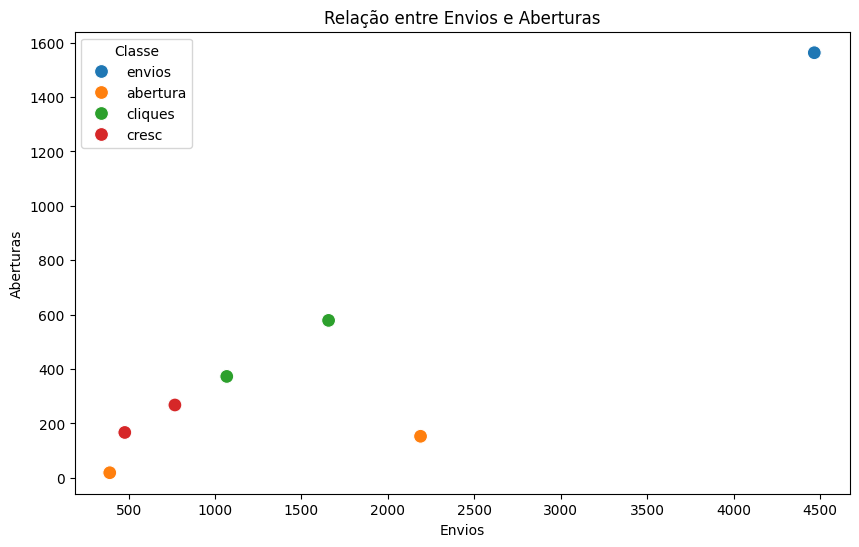

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Envios', y='Aberturas', hue='Classe', data=df, s=100)
plt.title('Relação entre Envios e Aberturas')
plt.xlabel('Envios')
plt.ylabel('Aberturas')
plt.show()

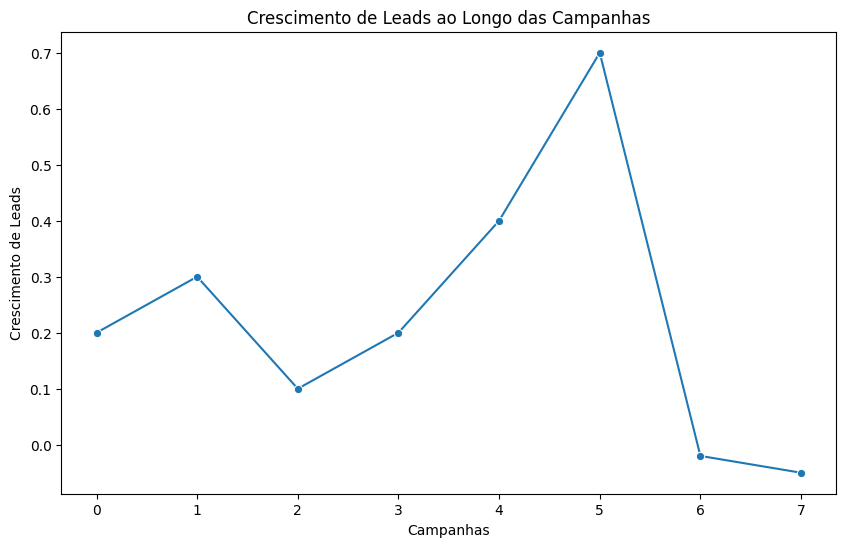

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df.index, y='Cresc_leads', data=df, marker='o')
plt.title('Crescimento de Leads ao Longo das Campanhas')
plt.xlabel('Campanhas')
plt.ylabel('Crescimento de Leads')
plt.show()

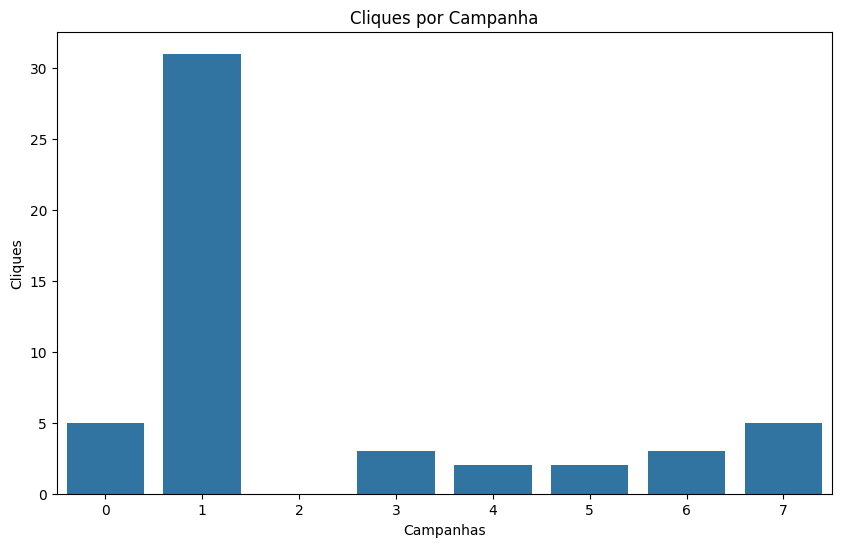

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df.index, y='Cliques', data=df)
plt.title('Cliques por Campanha')
plt.xlabel('Campanhas')
plt.ylabel('Cliques')
plt.show()